In [1]:
import pickle
import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

import seaborn
seaborn.set()
seaborn.set_style("ticks")
seaborn.set_context("poster")

In [2]:
path_pfx = '/content/gdrive/My Drive/CS/violins/'

# enable file writing in google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
glorot_nets = []
he_nets = []

for netid in [2,4,6]:
    with open(path_pfx + 'corr_test' + str(netid) + '.pkl', 'rb') as f:
        corr_test = pickle.load(f)
        corr_test = [corr_test[i].flatten() for i in range(len(corr_test))]
        corr_test = [corr_test[i][corr_test[i]<0.99999] for i in range(len(corr_test))]
    glorot_nets.append(corr_test)

for netid in [12,14,16]:
    with open(path_pfx + 'corr_test' + str(netid) + '.pkl', 'rb') as f:
        corr_test = pickle.load(f)
        corr_test = [corr_test[i].flatten() for i in range(len(corr_test))]
        corr_test = [corr_test[i][corr_test[i]<0.99999] for i in range(len(corr_test))]
    he_nets.append(corr_test)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


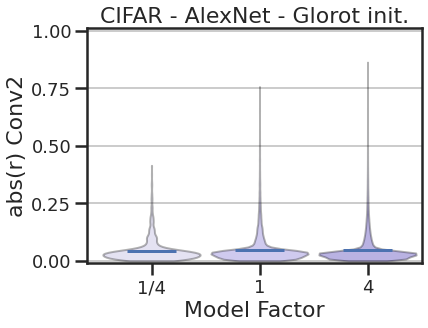

In [4]:
layer=1
fig = plt.figure(figsize=(8*0.75, 6*0.72))

violin_colors = ['#D2CFE5', '#998FD3', '#6D62CC']
violin_colors = ['#A8A1D6', '#6352C7', '#1902A1']

plt.title('CIFAR - AlexNet - Glorot init.\n', fontsize=22, y=.9)
plt.grid(True, which='both', axis='y')
plt.xlim((0.4, 3+0.5))
plt.ylim((-0.01, 1.01))
plt.xticks([])
plt.yticks([0, 0.25, 0.5, 0.75, 1], fontsize=18)
plt.ylabel('abs(r) Conv' + str(layer+1), fontsize=22)
plt.xticks([1,2,3], ['1/4', '1', '4'], fontsize=18)
plt.xlabel('Model Factor', fontsize=22)

violin_parts = plt.violinplot([np.abs(glorot_nets[i][layer]) for i in range(3)], 
                              positions=[i for i in range(1, 3+1)], 
                              widths=0.9, showmeans=True, showmedians=False, showextrema=False)

for i, pc in enumerate(violin_parts['bodies']):
        pc.set_facecolor(violin_colors[i])
        pc.set_edgecolor('black')
# leg = plt.legend(['1/4x', '1x', '4x'], loc=(0.05, 0.5), fontsize=16, title=r"$\bf{Model} \bf{Factor}$")
# leg.get_title().set_fontsize('15')
plt.rc('xtick',labelsize=8)
plt.show()
fig.savefig(path_pfx+'glorot_violins'+".pdf",format='pdf', bbox_inches='tight',dpi=1000)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


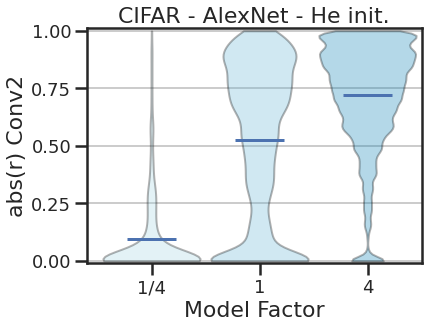

In [5]:
layer=1

fig = plt.figure(figsize=(8*0.75, 6*0.72))

# violin_colors = ['#DBEEF4', '#BCDDEB', '#A1C7DF']
violin_colors = ['#A3D4E3', '#66B3D4', '#0981B5']

plt.title('CIFAR - AlexNet - He init.\n', fontsize=22, y=.9)
plt.grid(True, which='both', axis='y')
plt.xlim((0.4, 3+0.5))
plt.ylim((-0.01, 1.01))
plt.xticks([])
plt.yticks([0, 0.25, 0.5, 0.75, 1], fontsize=18)
plt.ylabel('abs(r) Conv' + str(layer+1), fontsize=22)
plt.xticks([1,2,3], ['1/4', '1', '4'], fontsize=18)
plt.xlabel('Model Factor', fontsize=22)

violin_parts = plt.violinplot([np.abs(he_nets[i][layer]) for i in range(3)], 
                              positions=[i for i in range(1, 3+1)], 
                              widths=0.9, showmeans=True, showmedians=False, showextrema=False)

for i, pc in enumerate(violin_parts['bodies']):
        pc.set_facecolor(violin_colors[i])
        pc.set_edgecolor('black')
# leg = plt.legend(['1/4x', '1x', '4x'], loc=(0.05, 0.5), fontsize=16, title=r"$\bf{Model} \bf{Factor}$")
# leg.get_title().set_fontsize('15')
plt.rc('xtick',labelsize=8)
plt.show()
fig.savefig(path_pfx+'he_violins'+".pdf",format='pdf', bbox_inches='tight',dpi=1000)